In [ ]:
class KMeans():

  def __init__(self,n_clusters=2 , n_ite=300):
    self.n_clusters=n_clusters
    self.centroids = None
    self.n_ite = n_ite
    self.inertia_ = None

  def fit(self, X):
    #Incialização centroids
    self.initialize_k_centroids(X)
    #Treinaremos por self.n_ite iterações
    for it in range(self.n_ite):
      #Determina o cluster em que cada ponto está
      cluster_point = self.predict(X)
      #Calculamos a nova média para cada centróide
      new_centroids = zeros_like(self.centroids)
      dic = {}
      for i, p in enumerate(X):
        dic[cluster_point[i]] = dic.get(cluster_point[i], 0) + 1
        col = cluster_point[i]
        new_centroids[col] = new_centroids[col] + (p- new_centroids[col])/dic[col]  #media = (media*(n-1) + new_elem)/n = media + (new_elem - media )/n
      #Atualiza com os novos centroids calculados
      self.centroids = new_centroids
  
    self.inertia_ = self.inertia(X)
    return self

  def transform(self,X):
    return self.predict(X)

  def fit_transform(self,X):
    self.fit(X)
    return self.transform(X)

  def predict(self,X):
    #Qual cluster cada ponto está
    return self.__distance_to_all(X).argmin(axis=1)

  def __distance_to_all(self, X):
    #Calculamos a distância de cada ponto a todos os centroids se utilizando do recurso de broadcasting do numpy
    dists=np.zeros((len(X),len(self.centroids)))
    for i, c in enumerate(self.centroids):
      dists[:,i] = sqrt(square(X-c).sum(axis=1)) #Uma coluna j contém a distância ao centroid/cluster j para cada ponto na linha i 
    return dists

  def inertia(self, X ):
    return square(self.__distance_to_all(X).min(axis=1)).sum()

  def initialize_random(self):
    pass

  def initialize_k_centroids(self,X):
    random.seed()
    self.centroids = []
    self.centroids.append(X[np.random.randint(X.shape[0])])
    #self.plot_initialization(array(self.centroids))
    for i in range(self.n_clusters-1):
        dist = []
        for point in X:
            min_local = sys.maxsize
            for centroid in self.centroids:
                cur_dist = np.sum((point - centroid)**2)
                min_local = min(min_local, cur_dist)
            dist.append(min_local)

        pop = [i for i in range(len(dist))]
        index = random.choices(pop, weights=dist, k=1)
        next_centroid = X[index][0]

        self.centroids.append(next_centroid)
        dist.clear()
        #self.plot_initialization(np.array(self.centroids))

  def plot_initialization(self, centroids: np.array):
    plt.scatter(X[:, 0], X[:, 1], marker = '.', color = 'gray', label = 'data points')
    colors = ['red', 'green', 'blue' ]
    for i in range(len(centroids)):
      plt.scatter(centroids[i, 0], centroids[i, 1], marker = 'o', color = colors[i], label = '%dth selected centroid'%(i+1))
    plt.title('Centroids initialization')
    plt.legend()
    plt.xlim(-5, 35)
    plt.ylim(-5, 45)
    plt.show()



      





In [ ]:
DBSCAN(DB, distFunc, eps, minPts) {
    C := 0                                                  /* Cluster counter */
    for each point P in database DB {
        if label(P) ≠ undefined then continue               /* Previously processed in inner loop */
        Neighbors N := RangeQuery(DB, distFunc, P, eps)     /* Find neighbors */
        if |N| < minPts then {                              /* Density check */
            label(P) := Noise                               /* Label as Noise */
            continue
        }
        C := C + 1                                          /* next cluster label */
        label(P) := C                                       /* Label initial point */
        SeedSet S := N \ {P}                                /* Neighbors to expand */
        for each point Q in S {                             /* Process every seed point Q */
            if label(Q) = Noise then label(Q) := C          /* Change Noise to border point */
            if label(Q) ≠ undefined then continue           /* Previously processed (e.g., border point) */
            label(Q) := C                                   /* Label neighbor */
            Neighbors N := RangeQuery(DB, distFunc, Q, eps) /* Find neighbors */
            if |N| ≥ minPts then {                          /* Density check (if Q is a core point) */
                S := S ∪ N                                  /* Add new neighbors to seed set */
            }
        }
    }
}

In [340]:
import numpy as np
from numpy import array, full, square, sqrt, where

In [341]:

def DBSCAN(X, eps, minPts):
  neighborhood = lambda p : sqrt(square(X-p).sum(axis=1))<=eps
  labels = full(len(X), -1 ) #-1 -> undefined, -2 -> noise
  color = -1
  for i, p in enumerate(X):
    if(labels[i]!=-1): continue
    
    N = neighborhood(p)
    if(len(N[N==True])<minPts):
      labels[i] = -2 #Noise
      continue
    color+=1
    if(color==2): break
    labels[i] = color
    S = set(where(N==True)[0])
    for j in S:
      #if(labels[j]==-2): continue
        #labels[j] = color
      if(labels[j]!=-1): continue
      N = neighborhood(X[j])
      labels[j] = color

      #if(len(N[N==True])>=minPts):
      S = S.union(set(where(N==True)[0]))
        #labels[j] = color
        
  return labels
      


In [342]:
X = np.random.random((10000,2))

{0, 1, -1}


Text(0.5, 1.0, 'Predict data')

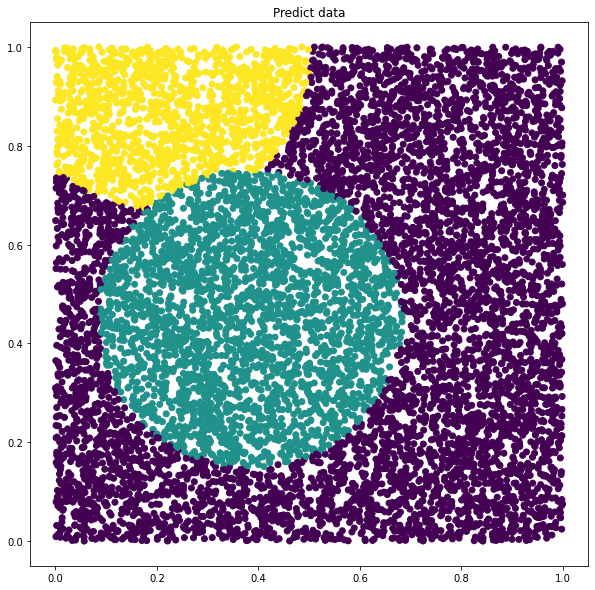

In [ ]:

eps =0.3
minPts = 3
 
import matplotlib.pyplot as plt
predict = DBSCAN(X, eps, minPts)
print(set(predict))
plt.figure(figsize=(10, 10))
plt.scatter(X[:, 0], X[:, 1], c=predict)
plt.title("Predict data")


In [ ]:
len(predict[predict==-2])

0

Text(0.5, 1.0, 'Predict data')

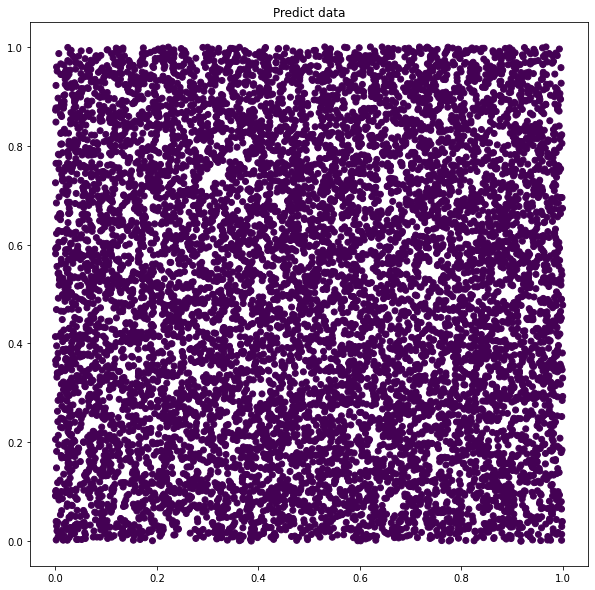

In [ ]:

from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

model =DBSCAN(eps=0.3, min_samples=3,metric="euclidean").fit(X)
predict = model.labels_
 
plt.figure(figsize=(10, 10))
plt.scatter(X[:, 0], X[:, 1], c=predict)
plt.title("Predict data")


In [ ]:
predict

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
full((5,5),1).sum(axis=1)

array([5, 5, 5, 5, 5])

In [ ]:
p=array([0,0])
X = full((2,2),1)
sqrt(square(X-p).sum(axis=1))<=0.3

array([False, False])